___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

## colab Update

In [ ]:
# colab Update
!sudo apt-get update -y -q && \
python --version && \
pip list --outdated && \
sudo pip3 install $(pip3 list --outdated | tail +3 | grep -v sdist | awk '{ print $1 }') --upgrade -q && \
pip install protobuf==3.20.* -q && \
pip install --upgrade jax jaxlib -q

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 88.7 kB in 1s (66.6 kB/s)
Reading package lists...
Python 3.7.1

In [ ]:
# Not required
# python3 -m venv tutorial-env
# !sudo apt-get install python3.9
# !python3.9 --version

## import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
# pd.set_option('display.float_format', lambda x: f'{x:.3f}')
# pd.set_option('display.float_format', lambda x: '%.4f'%x)
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [ ]:
random_state=42
seed=42

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
df_origin = pd.read_csv("./Churn_Modelling.csv")
df = df_origin.copy()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
(df.isna().mean()*100)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [ ]:
df.describe().T.style.background_gradient(cmap='PiYG_r', axis=1)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [ ]:
# skewness and kurtosis
pd.concat([
    df.skew(axis=0, skipna=True), 
    df.kurtosis(axis=0, skipna=True)], 
    axis=1, keys=['skew', 'kurtosis'
]).T

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
skew,0.0,0.001149,-0.071607,1.011320,0.010991,-0.141109,0.745568,-0.901812,-0.060437,0.002085,1.471611
kurtosis,-1.2,-1.196113,-0.425726,1.395347,-1.165225,-1.489412,0.582981,-1.186973,-1.996747,-1.181518,0.165671


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

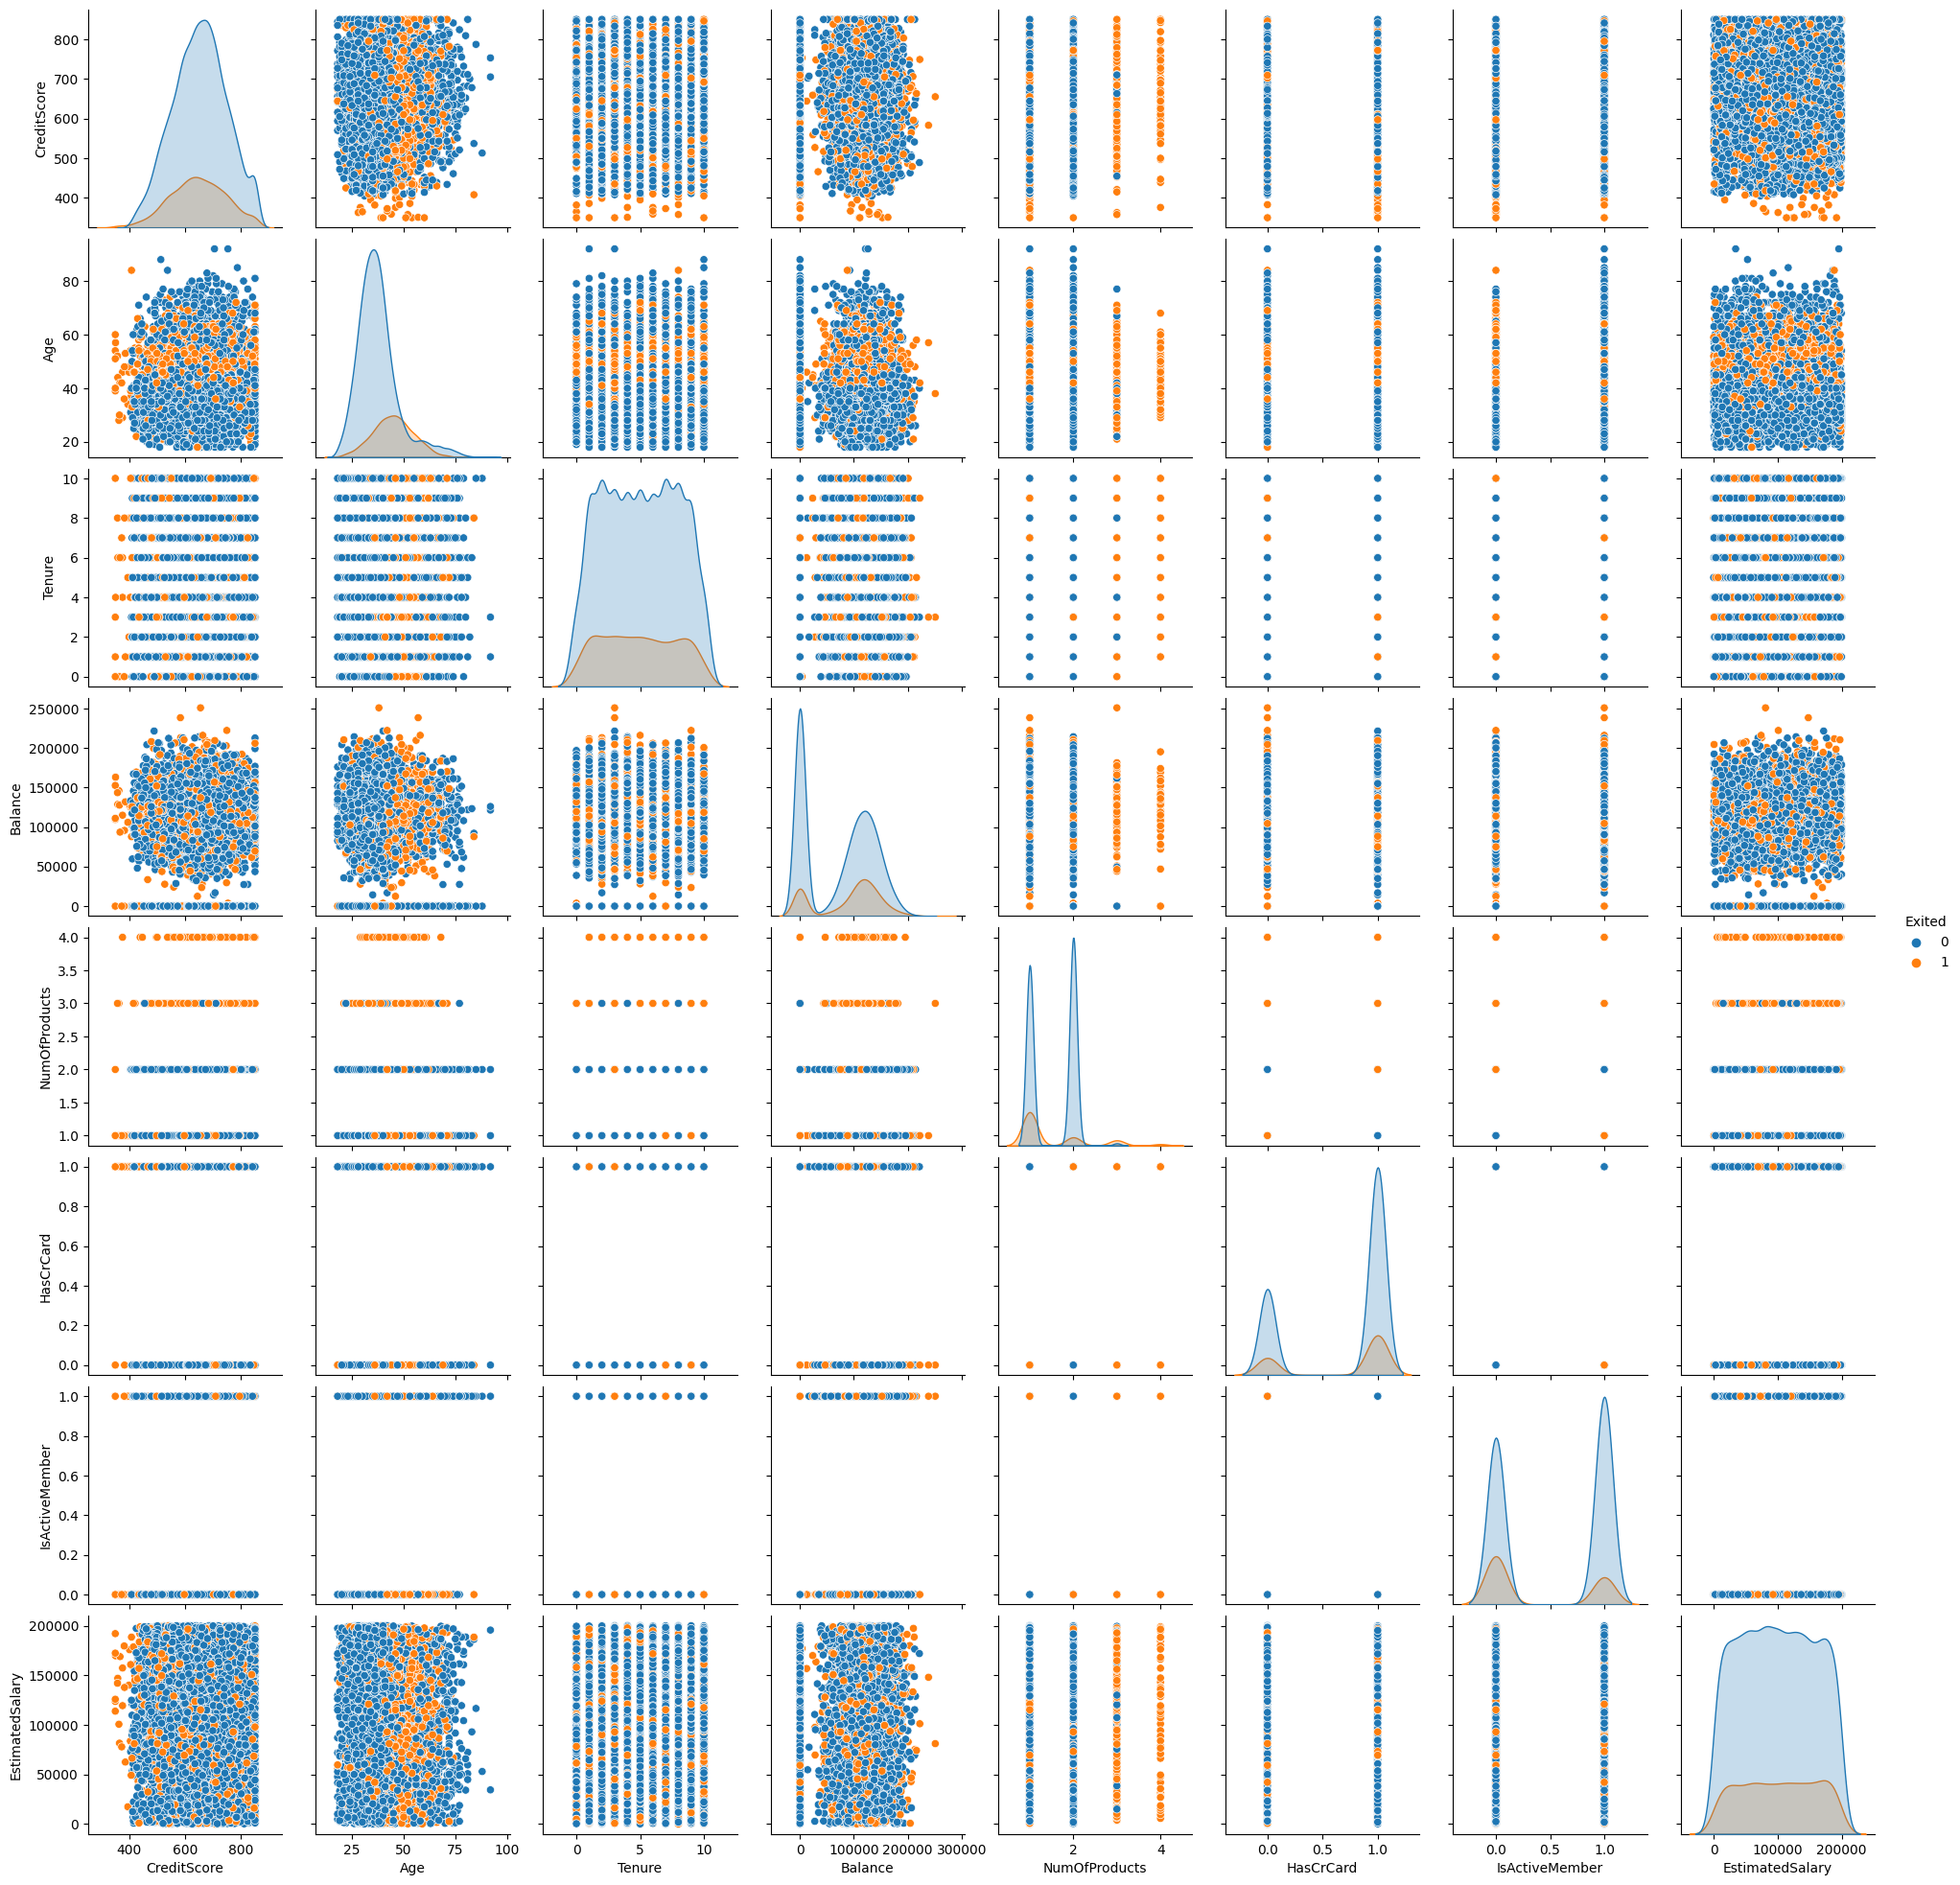

In [ ]:
sns.pairplot(df, hue= "Exited")

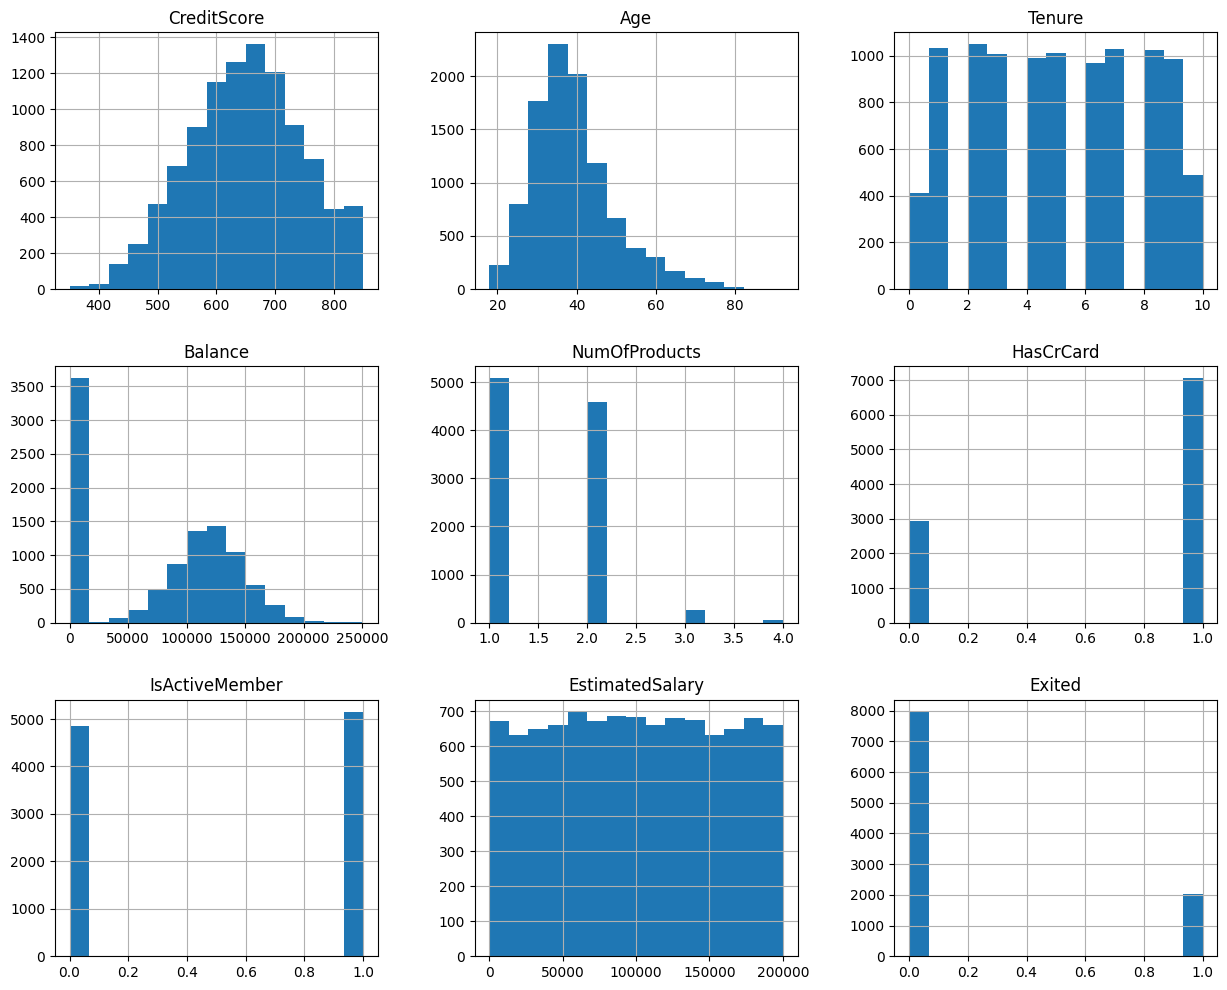

In [ ]:
df.hist(figsize=(15, 12), bins=15);

In [ ]:
# multiolinarity
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

<AxesSubplot:>

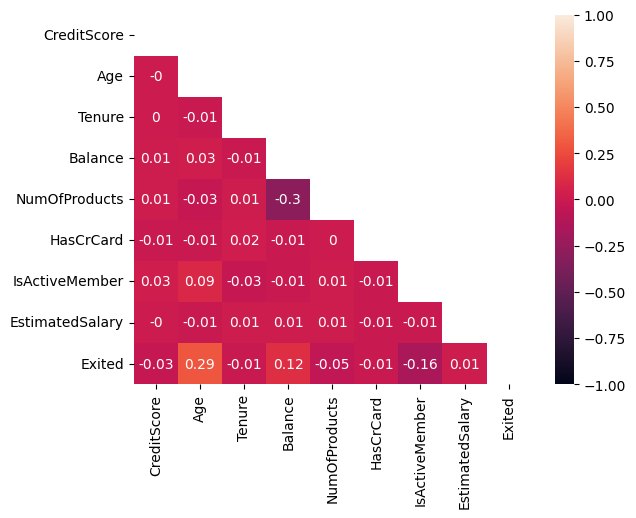

In [ ]:
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)

<AxesSubplot:>

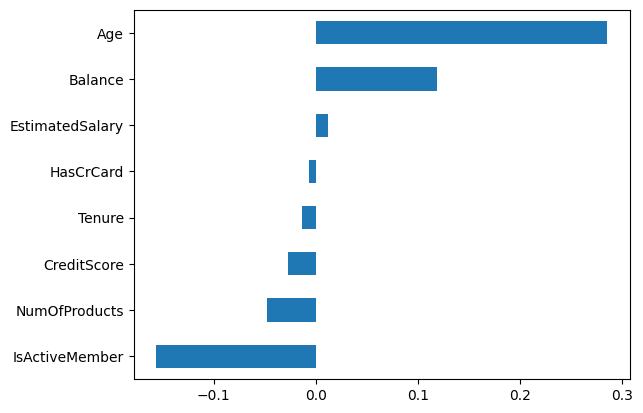

In [ ]:
df.corr()["Exited"].sort_values(ascending=True)[:-1].plot(kind="barh")

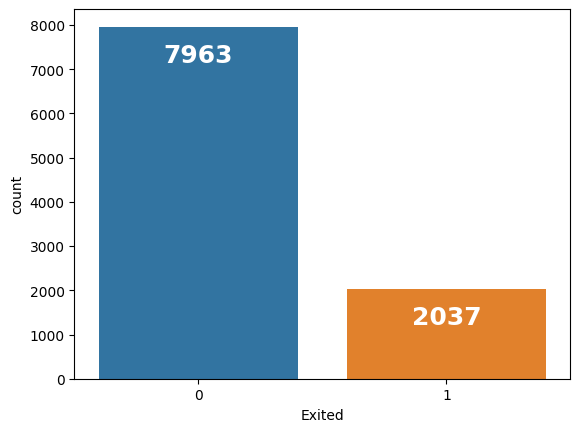

In [ ]:
g = sns.countplot(x=df["Exited"])
for c in g.containers:
  g.bar_label(c, padding=-29, fontsize=18, color='w', weight='bold');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_state)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [ ]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

# Modelling & Model Performance

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

2022-10-05 01:29:54.353005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-05 01:29:55.803984: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-05 01:29:59.460521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-10-05 01:29:59.461698: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinf

## without class_weigth

### Create The Model

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(15, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

2022-10-05 01:30:05.069884: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-05 01:30:05.070014: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0a01ee406b58): /proc/driver/nvidia/version does not exist
2022-10-05 01:30:05.071646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                210       
                                                                 
 dense_1 (Dense)             (None, 8)                 128       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 2000, verbose=0)

CPU times: user 4min 41s, sys: 15.3 s, total: 4min 57s
Wall time: 5min 23s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.528488,0.0,0.486030,0.0
1,0.483920,0.0,0.470574,0.0
2,0.472708,0.0,0.457888,0.0
3,0.463299,0.0,0.448736,0.0
4,0.457841,0.0,0.442844,0.0


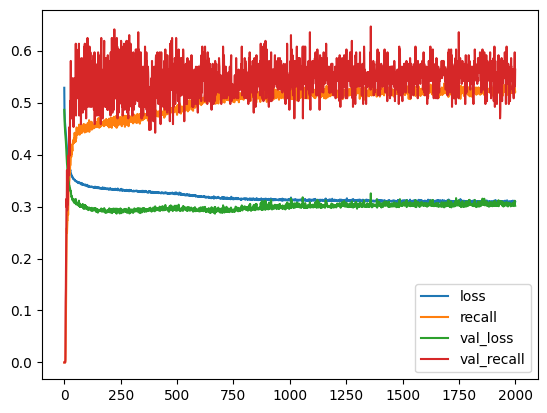

In [ ]:
loss_df.plot();

(0.3, 0.41)

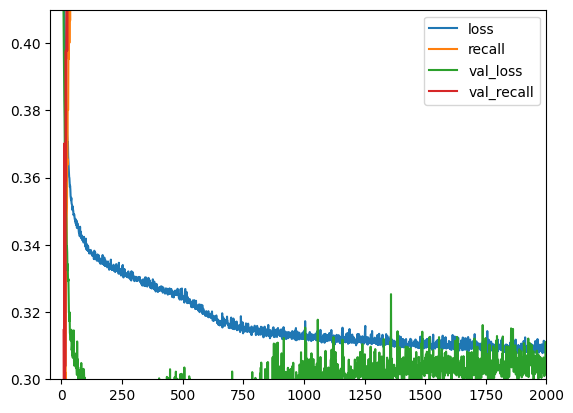

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.xlim([-45, 2000])
plt.ylim([0.3, 0.41])

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.3441055715084076, 0.46568626165390015]

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3441055715084076
recall :  0.46568626165390015


In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[766  30]
 [109  95]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.76      0.47      0.58       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.75      1000
weighted avg       0.85      0.86      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
# defining class_weights

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced", classes=np.unique(y_train), y=y_train) 
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(15, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"]) # early stop'u accuracy'ye bakarak da yapabiliriz.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                210       
                                                                 
 dense_5 (Dense)             (None, 8)                 128       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
model.fit(x=X_train, y=y_train, validation_split=.1, batch_size=128, epochs=2000, verbose=0, class_weight=class_weights)

CPU times: user 5min 6s, sys: 19.5 s, total: 5min 25s
Wall time: 5min 22s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.677786,0.653148,0.675283,0.701657
1,0.652071,0.665254,0.644753,0.696133
2,0.628918,0.650726,0.597524,0.657459
3,0.614911,0.673729,0.568622,0.651934
4,0.603287,0.660412,0.586055,0.729282
...,...,...,...,...
1995,0.419969,0.780872,0.443142,0.779006
1996,0.416351,0.780872,0.417821,0.762431
1997,0.417121,0.768160,0.461089,0.801105
1998,0.420157,0.792978,0.393841,0.723757


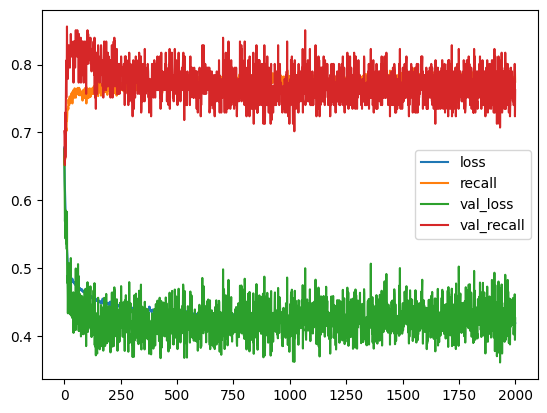

In [ ]:
loss_df.plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.48508337140083313, 0.7303921580314636]

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.48508337140083313
recall :  0.7303921580314636


In [ ]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[642 154]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.49      0.73      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.77      0.72      1000
weighted avg       0.83      0.79      0.80      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(15, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"]) # early stop'u accuracy'ye bakarak da yapabiliriz.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                210       
                                                                 
 dense_9 (Dense)             (None, 8)                 128       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
model.fit(x=X_train, y=y_train, validation_split=.1, batch_size=128, epochs=2000, verbose=0, class_weight=class_weights)

CPU times: user 5min 8s, sys: 20 s, total: 5min 28s
Wall time: 5min 23s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.682161,0.275424,0.605563,0.447514
1,0.650787,0.574455,0.620508,0.756906
2,0.622194,0.668886,0.592107,0.767956
3,0.600291,0.702179,0.599338,0.767956
4,0.589156,0.703995,0.527557,0.685083
...,...,...,...,...
1995,0.403811,0.811743,0.404988,0.767956
1996,0.397754,0.819613,0.403680,0.806630
1997,0.400543,0.811138,0.450262,0.828729
1998,0.403634,0.822034,0.360233,0.762431


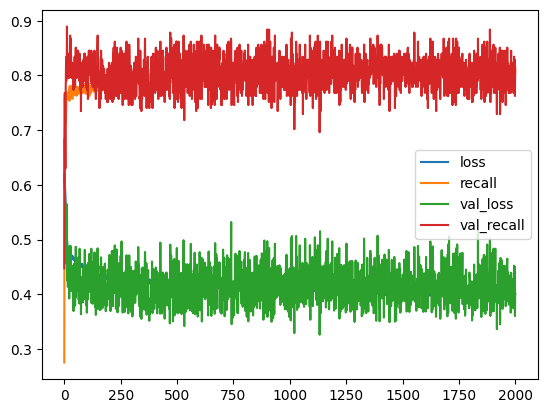

In [ ]:
loss_df.plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.4564034640789032, 0.7450980544090271]

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4564034640789032
recall :  0.7450980544090271


In [ ]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[634 162]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       796
           1       0.48      0.75      0.59       204

    accuracy                           0.79      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.79      0.80      1000



### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(15, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                210       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 128       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
%%time
model.fit(x=X_train, y=y_train, validation_split=.1, batch_size=128, epochs=2000, verbose=0, class_weight=class_weights)

CPU times: user 5min 5s, sys: 19.5 s, total: 5min 24s
Wall time: 4min 48s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.701816,0.387409,0.672301,0.613260
1,0.688869,0.567797,0.658977,0.646409
2,0.683525,0.640436,0.649859,0.668508
3,0.678329,0.631961,0.632350,0.668508
4,0.675189,0.622881,0.656177,0.762431
...,...,...,...,...
1995,0.508661,0.766344,0.452819,0.834254
1996,0.510775,0.777240,0.468375,0.856354
1997,0.508518,0.770581,0.460939,0.845304
1998,0.511126,0.791768,0.454149,0.845304


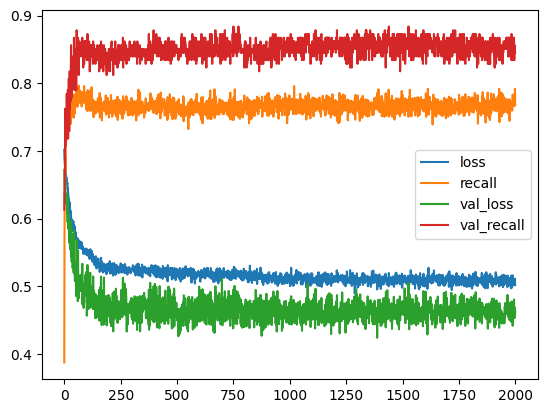

In [ ]:
loss_df.plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.4777038097381592, 0.8284313678741455]

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4777038097381592
recall :  0.8284313678741455


In [ ]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[576 220]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       796
           1       0.43      0.83      0.57       204

    accuracy                           0.74      1000
   macro avg       0.69      0.78      0.69      1000
weighted avg       0.84      0.74      0.77      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(15, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 15)                210       
                                                                 
 dense_17 (Dense)            (None, 8)                 128       
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 0, patience = 100, restore_best_weights = True)

In [ ]:
%%time
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 2000, verbose = 0,
          callbacks = [early_stop], class_weight=class_weights)

CPU times: user 2min 4s, sys: 8.86 s, total: 2min 13s
Wall time: 1min 55s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.664475,0.434625,0.589698,0.596685
1,0.633281,0.613801,0.615900,0.745856
2,0.611679,0.656174,0.575930,0.718232
3,0.593207,0.679177,0.566045,0.718232
4,0.581372,0.687651,0.533379,0.679558
...,...,...,...,...
236,0.445218,0.777240,0.388196,0.779006
237,0.445932,0.778450,0.426195,0.812155
238,0.445659,0.776029,0.393427,0.784530
239,0.445666,0.780872,0.374513,0.779006


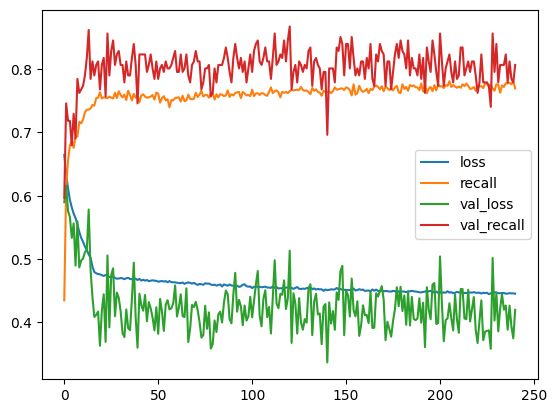

In [ ]:
loss_df.plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.3817375898361206, 0.656862735748291]

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3817375898361206
recall :  0.656862735748291


In [ ]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[700  96]
 [ 70 134]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       796
           1       0.58      0.66      0.62       204

    accuracy                           0.83      1000
   macro avg       0.75      0.77      0.76      1000
weighted avg       0.84      0.83      0.84      1000



#### Monitor the "val_recall" as metric

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(15, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 15)                210       
                                                                 
 dense_21 (Dense)            (None, 8)                 128       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 0, patience = 25, restore_best_weights = True)

In [ ]:
%%time
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 2000, verbose = 0,
          callbacks = [early_stop], class_weight=class_weights)

CPU times: user 25.6 s, sys: 1.94 s, total: 27.6 s
Wall time: 23.9 s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.675962,0.491525,0.638867,0.519337
1,0.644725,0.559927,0.653428,0.729282
2,0.623265,0.651937,0.601668,0.756906
3,0.606323,0.696731,0.614867,0.784530
4,0.592027,0.697942,0.537195,0.679558
5,0.580434,0.687046,0.556089,0.734807
6,0.572213,0.698547,0.502662,0.657459
7,0.567723,0.683414,0.587585,0.784530
8,0.561334,0.693705,0.516274,0.740331
9,0.552689,0.687046,0.510752,0.734807


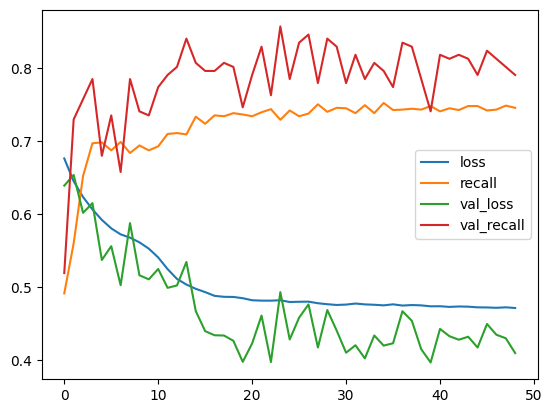

In [ ]:
loss_df.plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.5350087285041809, 0.7941176295280457]

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5350087285041809
recall :  0.7941176295280457


In [ ]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[568 228]
 [ 42 162]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       796
           1       0.42      0.79      0.55       204

    accuracy                           0.73      1000
   macro avg       0.67      0.75      0.68      1000
weighted avg       0.83      0.73      0.75      1000



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [ ]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# def build_classifier():
#     tf.random.set_seed(seed)
#     classifier = Sequential()
#     classifier.add(Dense(units = 36, activation = 'relu'))
#     classifier.add(Dense(units = 18, activation = 'relu'))
#     classifier.add(Dense(units = 9, activation = 'relu'))
#     classifier.add(Dense(units = 1, activation = 'sigmoid'))
#     classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier

In [ ]:
# classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

# scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
#                         scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

# df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

# df_scores

In [ ]:
# df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
#                                  index = ["acc", "pre", "rec", "f1"])

# df_scores_summary

## GridSearchCV

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [ ]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 0, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 0)

In [ ]:
%%time
grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

2022-10-05 01:53:51.919174: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-05 01:53:52.136003: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-05 01:53:54.585281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-10-05 01:53:54.585503: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
20

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Epoch 25/200
203/203 [==============================] - 1s 6ms/step - loss: 0.5768 - recall: 0.7024 - val_loss: 0.5615 - val_recall: 0.7015
Epoch 15/200
203/203 [==============================] - 1s 4ms/step - loss: 0.4831 - recall: 0.7749 - val_loss: 0.4851 - val_recall: 0.8543
Epoch 26/200
203/203 [==============================] - 1s 5ms/step - loss: 0.5743 - recall: 0.6918 - val_loss: 0.5787 - val_recall: 0.7090
Epoch 16/200
203/203 [==============================] - 1s 6ms/step - loss: 0.4804 - recall: 0.7712 - val_loss: 0.4658 - val_recall: 0.8344
Epoch 27/200
203/203 [==============================] - 1s 6ms/step - loss: 0.5746 - recall: 0.6956 - val_loss: 0.5680 - val_recall: 0.7090
Epoch 17/200
203/203 [==============================] - 1s 4ms/step - loss: 0.4803 - recall: 0.7697 - val_loss: 0.4428 - val_recall: 0.8344
Epoch 28/200
203/203 [==============================] - 1s 3ms/step - loss: 0.5737 - recall: 0.7017 - val_loss: 0

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7a9c1d1710>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'learn_rate': [0.001, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall')

In [ ]:
grid_model.best_score_

0.9032242177311464

In [ ]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [ ]:
#grid_model.cv_results_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
13,0.903224,0.028130,1,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
15,0.883724,0.047381,2,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
5,0.864492,0.041046,3,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
8,0.852925,0.057541,4,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
7,0.851955,0.034183,5,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
12,0.841969,0.038333,6,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
0,0.841895,0.024277,7,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.830499,0.031005,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.818120,0.024959,9,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
9,0.806856,0.043167,10,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[439 357]
 [ 24 180]]
              precision    recall  f1-score   support

           0       0.95      0.55      0.70       796
           1       0.34      0.88      0.49       204

    accuracy                           0.62      1000
   macro avg       0.64      0.72      0.59      1000
weighted avg       0.82      0.62      0.65      1000



#### ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve)

In [ ]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

32/32 [==============================] - 0s 1ms/step


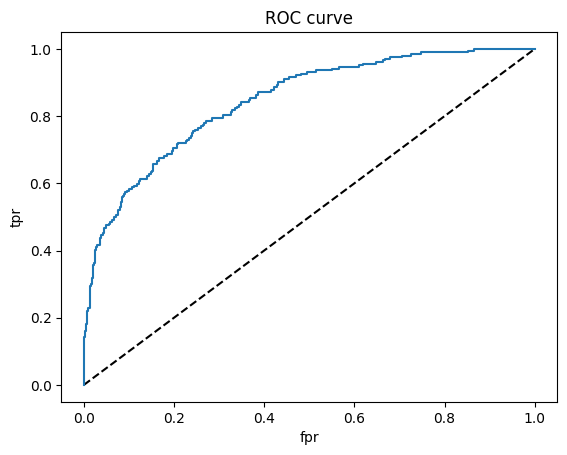

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8447753473248596

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.6555218304875454

#### for gridsearchcv model

32/32 [==============================] - 0s 1ms/step


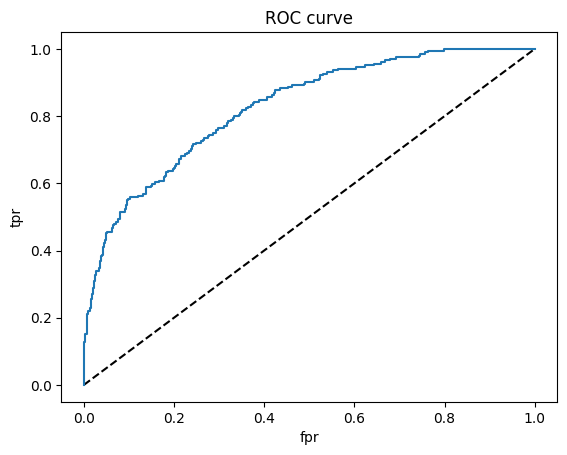

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8261528229382205

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.6197522120402778

#### Precision-Recall Curve and AP (Average Precision) for grid_model

# Final Model and Model Deployment

In [ ]:
X.shape, y.shape

((10000, 10), (10000,))

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [ ]:
X = column_trans.fit_transform(X)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced", classes=np.unique(y), y=y) 
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279040562602034, 1: 2.454590083456063}

## Final Model

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(15, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = RMSprop(lr=0.005), loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 0, patience = 15, restore_best_weights = True)

In [ ]:
%%time
model.fit(x = X, y = y, validation_split = 0.1, batch_size = 64, epochs = 200, verbose = 0,
          callbacks = [early_stop], class_weight=class_weights)

CPU times: user 7.52 s, sys: 463 ms, total: 7.98 s
Wall time: 7.15 s


<AxesSubplot:>

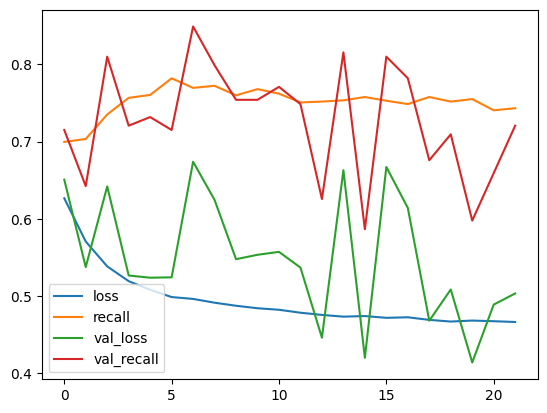

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, recall = model.evaluate(X, y, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.6288024187088013
recall :  0.8782523274421692


In [ ]:
y_pred = model.predict(X) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

313/313 [==============================] - 0s 1ms/step
[[4810 3153]
 [ 248 1789]]
              precision    recall  f1-score   support

           0       0.95      0.60      0.74      7963
           1       0.36      0.88      0.51      2037

    accuracy                           0.66     10000
   macro avg       0.66      0.74      0.63     10000
weighted avg       0.83      0.66      0.69     10000



In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8261528229382205

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.6197522120402778

## Saving Final Model and Scaler

In [ ]:
import pickle

pickle.dump(column_trans, open("transform_customer_churn", 'wb'))

In [ ]:
model.save('model_customer_churn.h5')

## Loading Model and Scaler

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
transform_churn = pickle.load(open("transform_customer_churn", "rb"))
model_churn = load_model('model_customer_churn.h5')

## Prediction

In [ ]:
df['Exited'].head(1)

0    1
Name: Exited, dtype: int64

In [ ]:
mean_human = df.drop('Exited', axis = 1).iloc[0:1, :]
mean_human

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [ ]:
mean_human = transform_churn.transform(mean_human)
mean_human

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489]])

In [ ]:
result = (model_churn.predict(mean_human)>0.5).astype("uint8")
result

1/1 [==============================] - 0s 91ms/step


array([[1]], dtype=uint8)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___